In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import plotly.express as px

In [2]:
df_co2 = pd.read_csv("top_co2_diff.csv")
df_inc = pd.read_csv("top_income_diff.csv")
df_co2

,index,Country,CO2_new,CO2_last,difference
0,19,Bosnia and Herzegovina,6.38,0.88,5.50
1,31,China,7.61,2.56,5.05
2,98,Malaysia,7.93,4.21,3.72
3,138,Seychelles,6.25,2.66,3.59
4,74,"Iran, Islamic Rep.",7.60,4.42,3.18
...,...,...,...,...,...
174,154,Sweden,3.41,6.60,-3.19
175,114,Nauru,5.57,9.37,-3.80
176,169,Ukraine,3.94,7.75,-3.81
177,170,United Kingdom,5.22,9.08,-3.86


Merging and Visualizing the data

In [3]:
df_inc

,Country,GDP_per_capita_USD_New,GDP_per_capita_USD_Last,difference
0,Liechtenstein,169049.156900,78631.699110,90417.457790
1,Monaco,189487.147100,101866.604100,87620.543000
2,Bermuda,116153.166100,33989.723160,82163.442940
3,Isle of Man,86481.552590,12681.614150,73799.938440
4,"Macao SAR, China",86197.365690,18277.042500,67920.323190
...,...,...,...,...
257,Curacao,19024.177230,19446.456570,-422.279340
258,South Sudan,1119.651437,1669.493752,-549.842315
259,Northern Mariana Islands,20659.640290,21981.784560,-1322.144270
260,Syrian Arab Republic,1265.606190,3545.808903,-2280.202713


In [4]:
df = pd.merge(df_inc, df_co2, how ='inner', on =['Country'])
df

df = df.rename(columns={"difference_x": "GDP_per_capita_USD", "difference_y": "CO2"})
print(df)
#Country,GDP_per_capita_USD_New,GDP_per_capita_USD_Last,difference

                  Country  GDP_per_capita_USD_New  GDP_per_capita_USD_Last  \
0           Liechtenstein           169049.156900             78631.699110   
1                 Ireland            80886.615740             19158.456480   
2                 Iceland            68941.462230             26633.591380   
3               Singapore            65831.189430             24914.411260   
4                  Norway            75719.752900             34875.704330   
..                    ...                     ...                      ...   
173               Somalia              419.394808               350.168162   
174               Burundi              223.862876               167.098888   
175           South Sudan             1119.651437              1669.493752   
176  Syrian Arab Republic             1265.606190              3545.808903   
177                 Japan            40458.001880             44197.619100   

     GDP_per_capita_USD  index  CO2_new  CO2_last   CO2  
0    

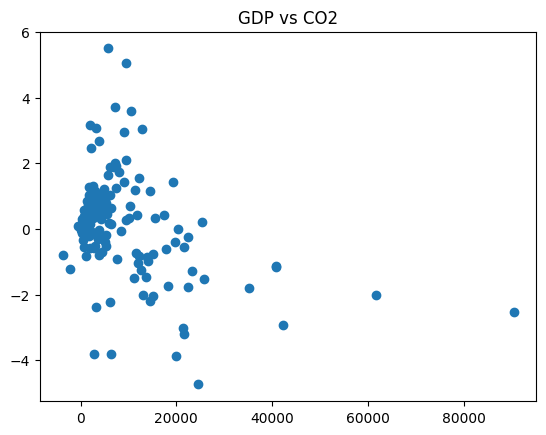

In [5]:
plt.plot()
plt.title('GDP vs CO2')
plt.scatter(df['GDP_per_capita_USD'], df['CO2'])
plt.show()

 Building the clustering model and calculating the values of the Distortion and Inertia

In [6]:
X = np.array(list(zip(df['GDP_per_capita_USD'], df['CO2']))).reshape(len(df['GDP_per_capita_USD']), 2)
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

Tabulating and Visualizing the results

In [7]:
#Using the different values of Distortion
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 6951.976868933108
2 : 4429.086553036731
3 : 2936.480891563419
4 : 2590.2458571908637
5 : 1900.950095497212
6 : 1345.815200574729
7 : 1213.8514017181158
8 : 989.6519916416955
9 : 850.8679234416908


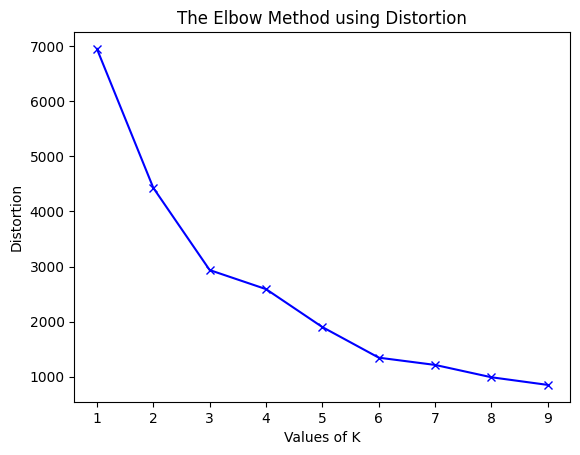

In [8]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [9]:
#Using the different values of Inertia
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 21641892685.840916
2 : 9123144584.930395
3 : 3891751316.3196316
4 : 2111327842.3413217
5 : 1202346046.3745723
6 : 812797652.0581989
7 : 431804024.2868352
8 : 320449257.52000374
9 : 243014804.4783687


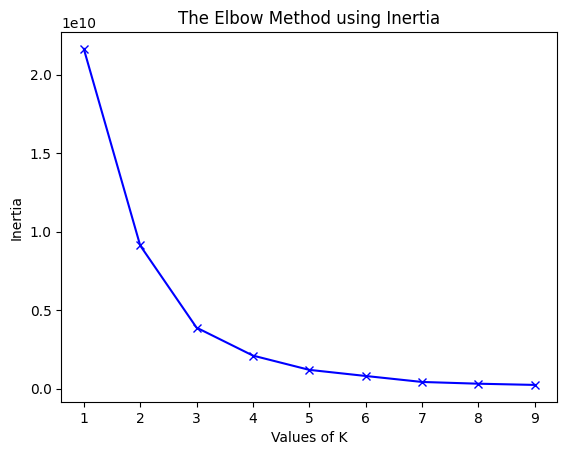

In [10]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

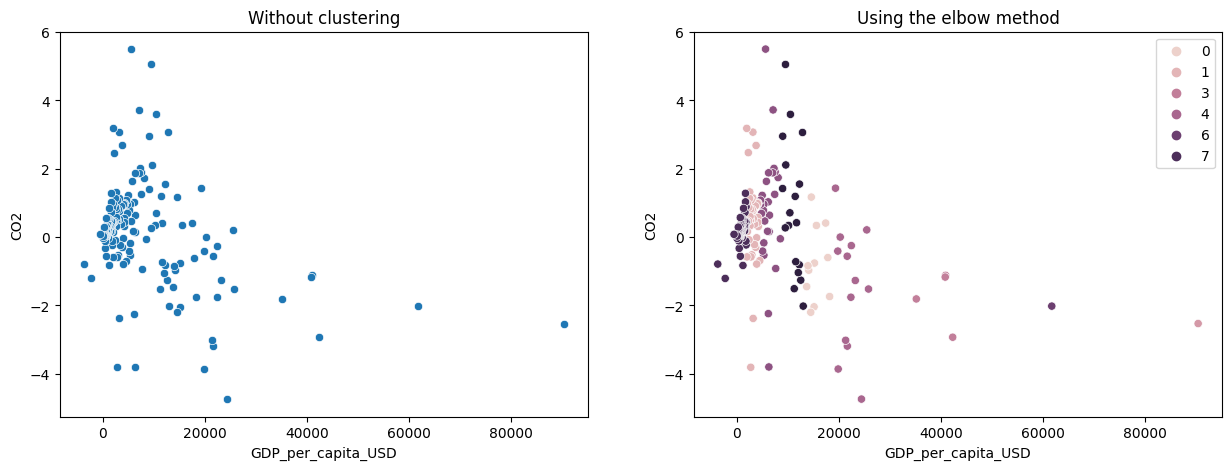

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='GDP_per_capita_USD', y='CO2').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='GDP_per_capita_USD', y='CO2', hue=kmeanModel.labels_).set_title('Using the elbow method');